In [1]:
# Imports
# https://docs.fast.ai/tabular.data.html
from fastai.tabular.all import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
# Read Data
df_train = pd.read_csv("../data/clean_fraudTrain.csv")
df_test= pd.read_csv("../data/clean_fraudTest.csv")
df_train.head()

,credit_card_num,shop,category,amount,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,31
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,41
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,43.150704,-112.154481,0,57
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,47.034331,-112.561071,0,52
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,38.674999,-78.632459,0,33


In [3]:
# Set Variables according our dataset
# Categorical

cat_cols = ['shop','category', 'gender','job']
# Continuous 
cont_cols = ['credit_card_num', 'amount','lat','long','city_pop','merch_lat','merch_long','age']

# Target Value
y_names = 'is_fraud'

# Procedure List
procs = [Categorify, Normalize] # We don't need to FillMissing values because our dataset was clened before.

In [4]:
# Create TabularDataLoader using train dataframe and the target "is_fraud"
dls = TabularDataLoaders.from_df(df_train, path='.', y_names="is_fraud",  
                                 cat_names = cat_cols, 
                                 cont_names = cont_cols, 
                                 procs=procs, 
                                 y_block = CategoryBlock())

In [5]:
# Metrics used: Accuracy Error Rate Recall Precision
tab_learn = tabular_learner(dls, layers=[200], metrics=[accuracy, error_rate, Recall(), Precision()])

SuggestedLRs(valley=0.005248074419796467)

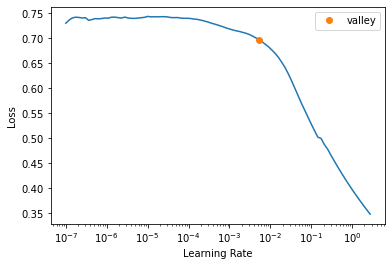

In [6]:
# Plot Learning Rate
tab_learn.lr_find()

In [7]:
# Fit our model
tab_learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,0.014863,0.046953,0.994320,0.005680,0.377432,0.531507,02:30
1,0.016092,0.029082,0.994224,0.005776,0.059014,0.659420,02:55
2,0.009887,0.025327,0.994918,0.005082,0.260700,0.693103,02:48


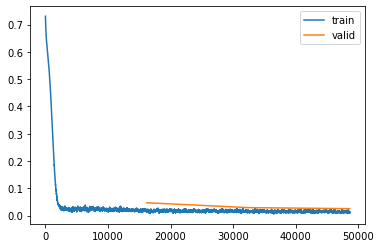

In [8]:
# Plot the learning rate vs loss
tab_learn.recorder.plot_loss()

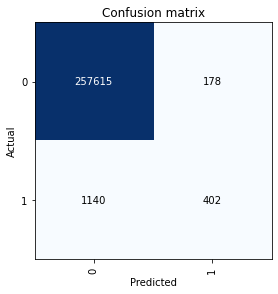

In [9]:
# Correlation Matrix of the learning model
interpret = ClassificationInterpretation.from_learner(tab_learn)
interpret.plot_confusion_matrix()

In [10]:
# General report
interpret.print_classification_report()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257793
           1       0.69      0.26      0.38      1542

    accuracy                           0.99    259335
   macro avg       0.84      0.63      0.69    259335
weighted avg       0.99      0.99      0.99    259335



In [11]:
# Init Test DL
test_dl = tab_learn.dls.test_dl(df_test)
test_dl.show_batch()

,shop,category,gender,job,credit_card_num,amount,lat,long,city_pop,merch_lat,merch_long,age,is_fraud
0,fraud_Kirlin and Sons,personal_care,M,Mechanical engineer,2.291160e+15,2.860002,33.9659,-80.9355,333496.994635,33.986391,-81.200714,52.000000,0
1,fraud_Sporer-Keebler,personal_care,F,"Sales professional, IT",3.573021e+15,29.840000,40.3207,-110.4360,301.997385,39.450498,-109.960431,30.000000,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,F,"Librarian, public",3.598202e+15,41.280001,40.6729,-73.5365,34495.997884,40.495810,-74.196111,50.000000,0
3,fraud_Haley Group,misc_pos,M,Set designer,3.591926e+15,60.050000,28.5697,-80.8191,54767.000676,28.812398,-80.883061,33.000000,0
4,fraud_Johnston-Casper,travel,M,Furniture designer,3.526831e+15,3.190002,44.2529,-85.0170,1125.998958,44.959148,-85.884734,65.000001,0
5,fraud_Daugherty LLC,kids_pets,F,Psychotherapist,3.042145e+13,19.549998,42.1939,-76.7361,519.999548,41.747157,-77.584197,29.000000,0
6,fraud_Romaguera Ltd,health_fitness,F,"Therapist, occupational",2.131937e+14,133.929998,40.5070,-123.9743,1138.999375,41.499458,-124.888731,69.000000,0
7,fraud_Reichel LLC,personal_care,F,"Development worker, international aid",3.589276e+15,10.370002,43.7557,-97.5936,342.995934,44.495498,-97.728453,48.000000,0
8,"fraud_Goyette, Howell and Collier",shopping_pos,M,Advice worker,3.596370e+15,4.370001,41.0001,-78.2357,3687.998956,41.546067,-78.120238,47.000000,0
9,fraud_Kilback Group,food_dining,F,Barrister,3.546906e+15,66.540000,31.6591,-96.8094,262.996131,31.782919,-96.366185,64.000001,0


In [12]:
# Predict test dataframe
preds, test_labels = tab_learn.get_preds(dl=test_dl)

In [13]:
# Adjust prediction target to binary
final_preds = preds.numpy()
final_preds = np.argmax(final_preds, axis=1)

In [14]:
# Adding predicted target column
res = df_test.copy(deep=True)
res['is_fraud_pred'] = final_preds

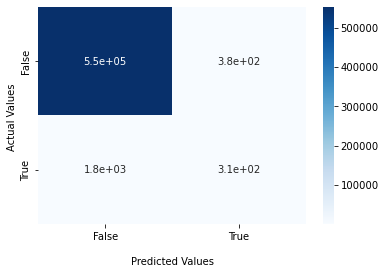

In [15]:
# Generate confusion matrix of testing model
confusion_matrix = pd.crosstab(res['is_fraud'], res['is_fraud_pred'], rownames=['Actual'], colnames=['Predicted'])

ax = sn.heatmap(confusion_matrix, annot=True, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

# Display the visualization of the Confusion Matrix.
plt.show()